# **Exploratory Data Analysis**

**1-** First, I add all the necessary libraries for the homework.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

**2-** I uploaded 'penguins_size.csv' data set to colab.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.xlsx to Dry_Bean_Dataset.xlsx


**3-** Load it into pandas dataframe and test it full scale to see if everything is okay

In [4]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


**4-** Exploring the dataset, giving basic statistical information about it. (null olmadığı için 'isnull' testini koymadım)

In [5]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
data.info() #dtype içerdiği için dtype sorgusunu yazmadım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
data['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


**5-** Visualizin the dataset thoroughly, including scatter plots, box plots and pair plots etc.

Visualizing the distribution of each feature using box plots

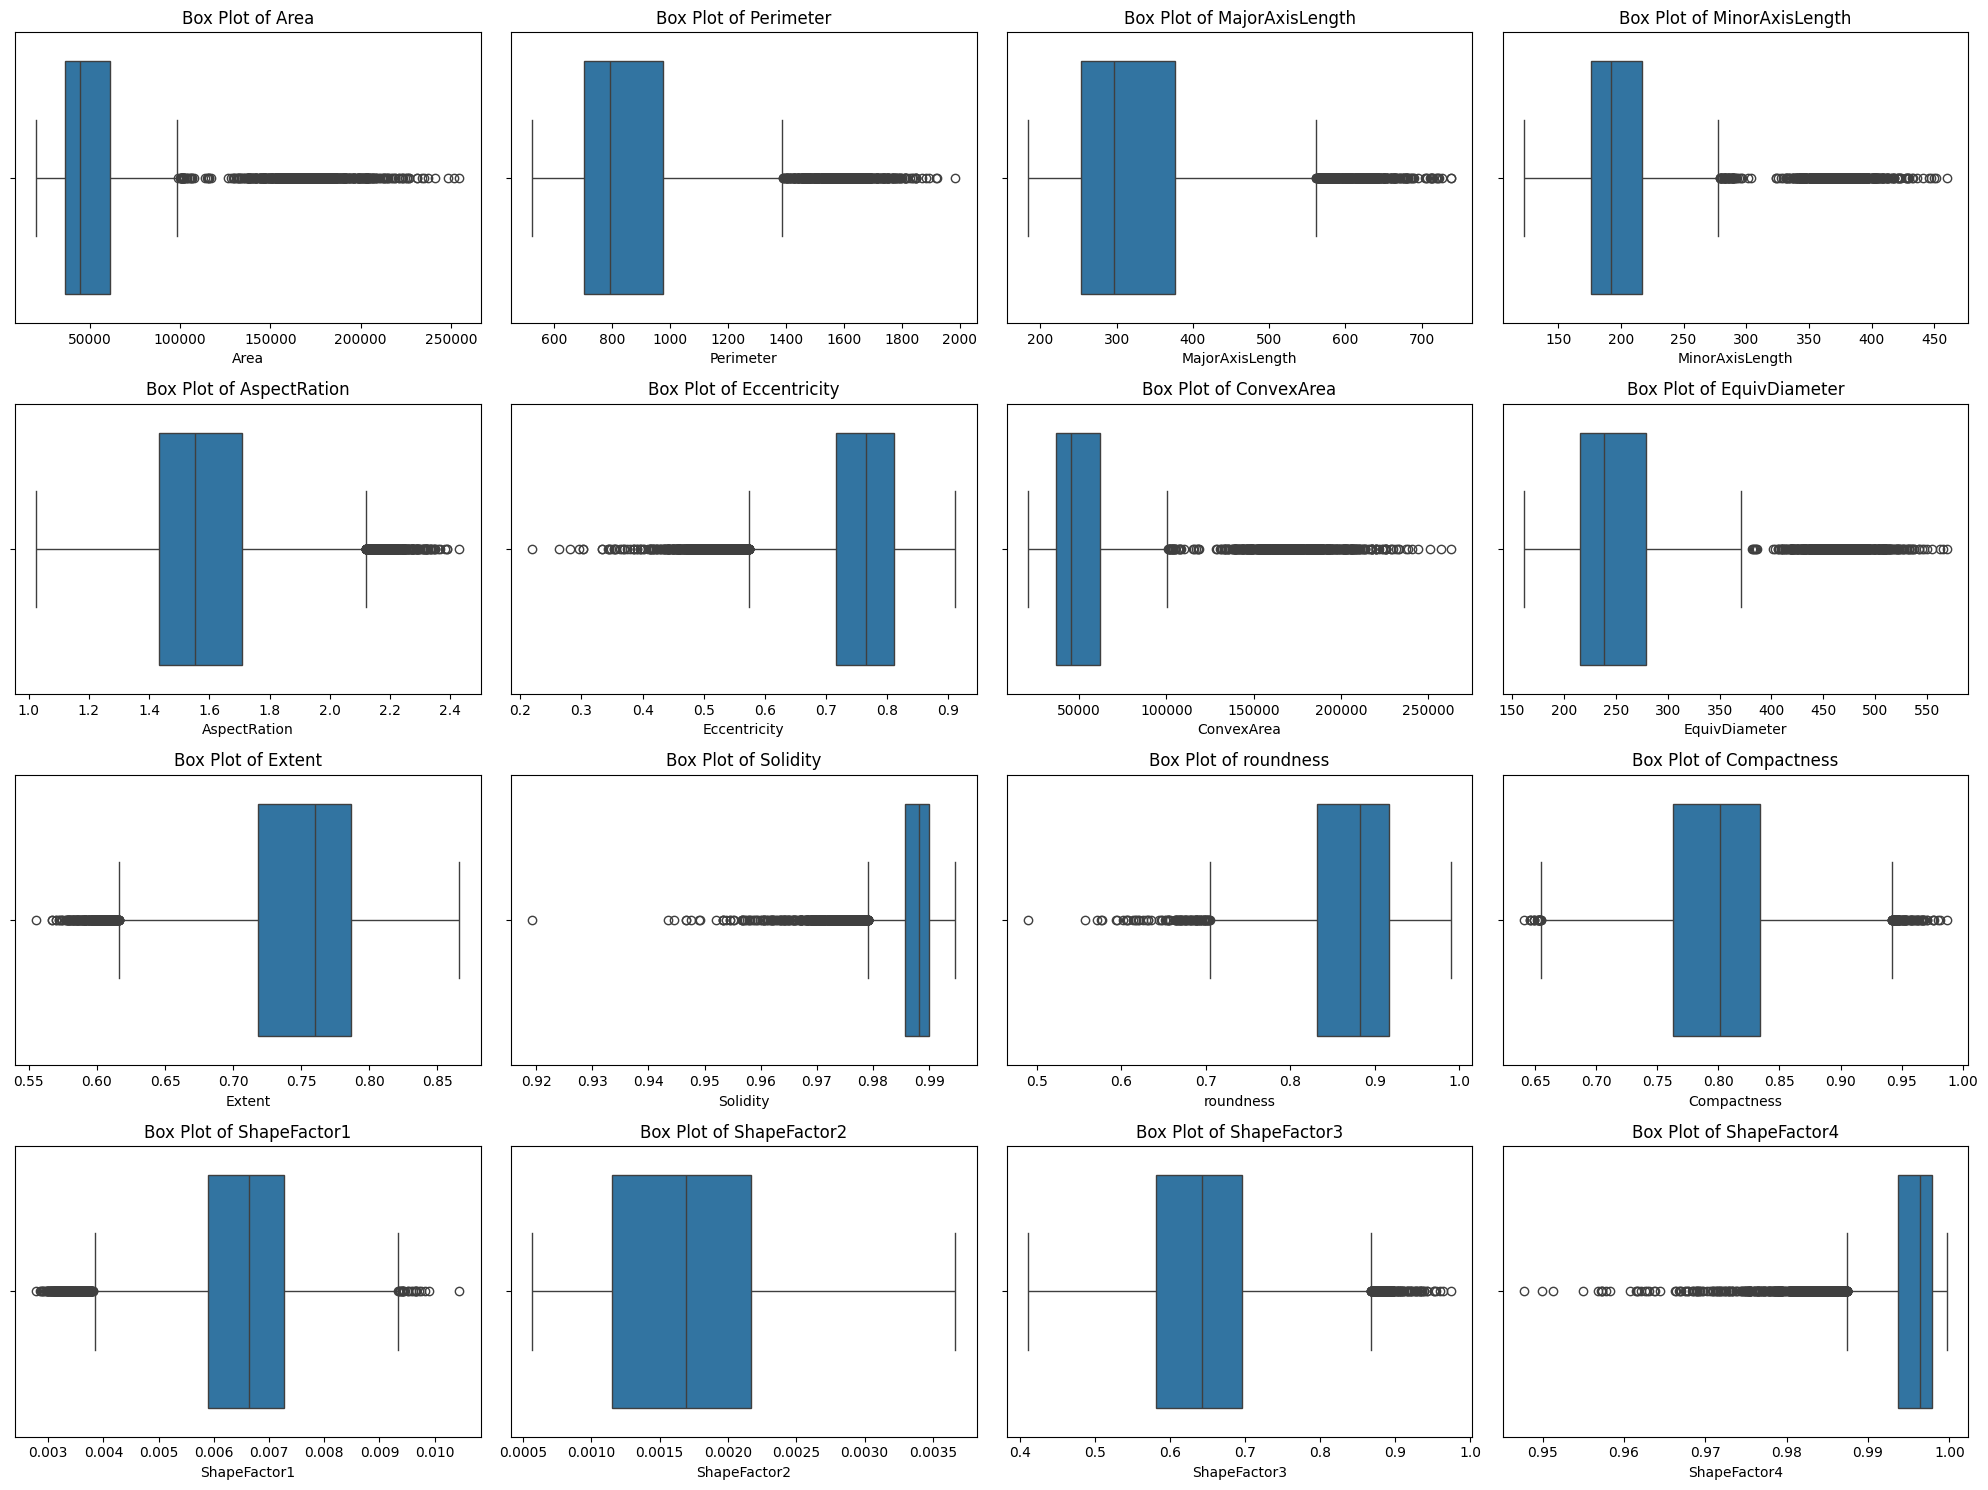

In [9]:
#box-plot gösterimi
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Visualizing the distribution of each feature using histograms

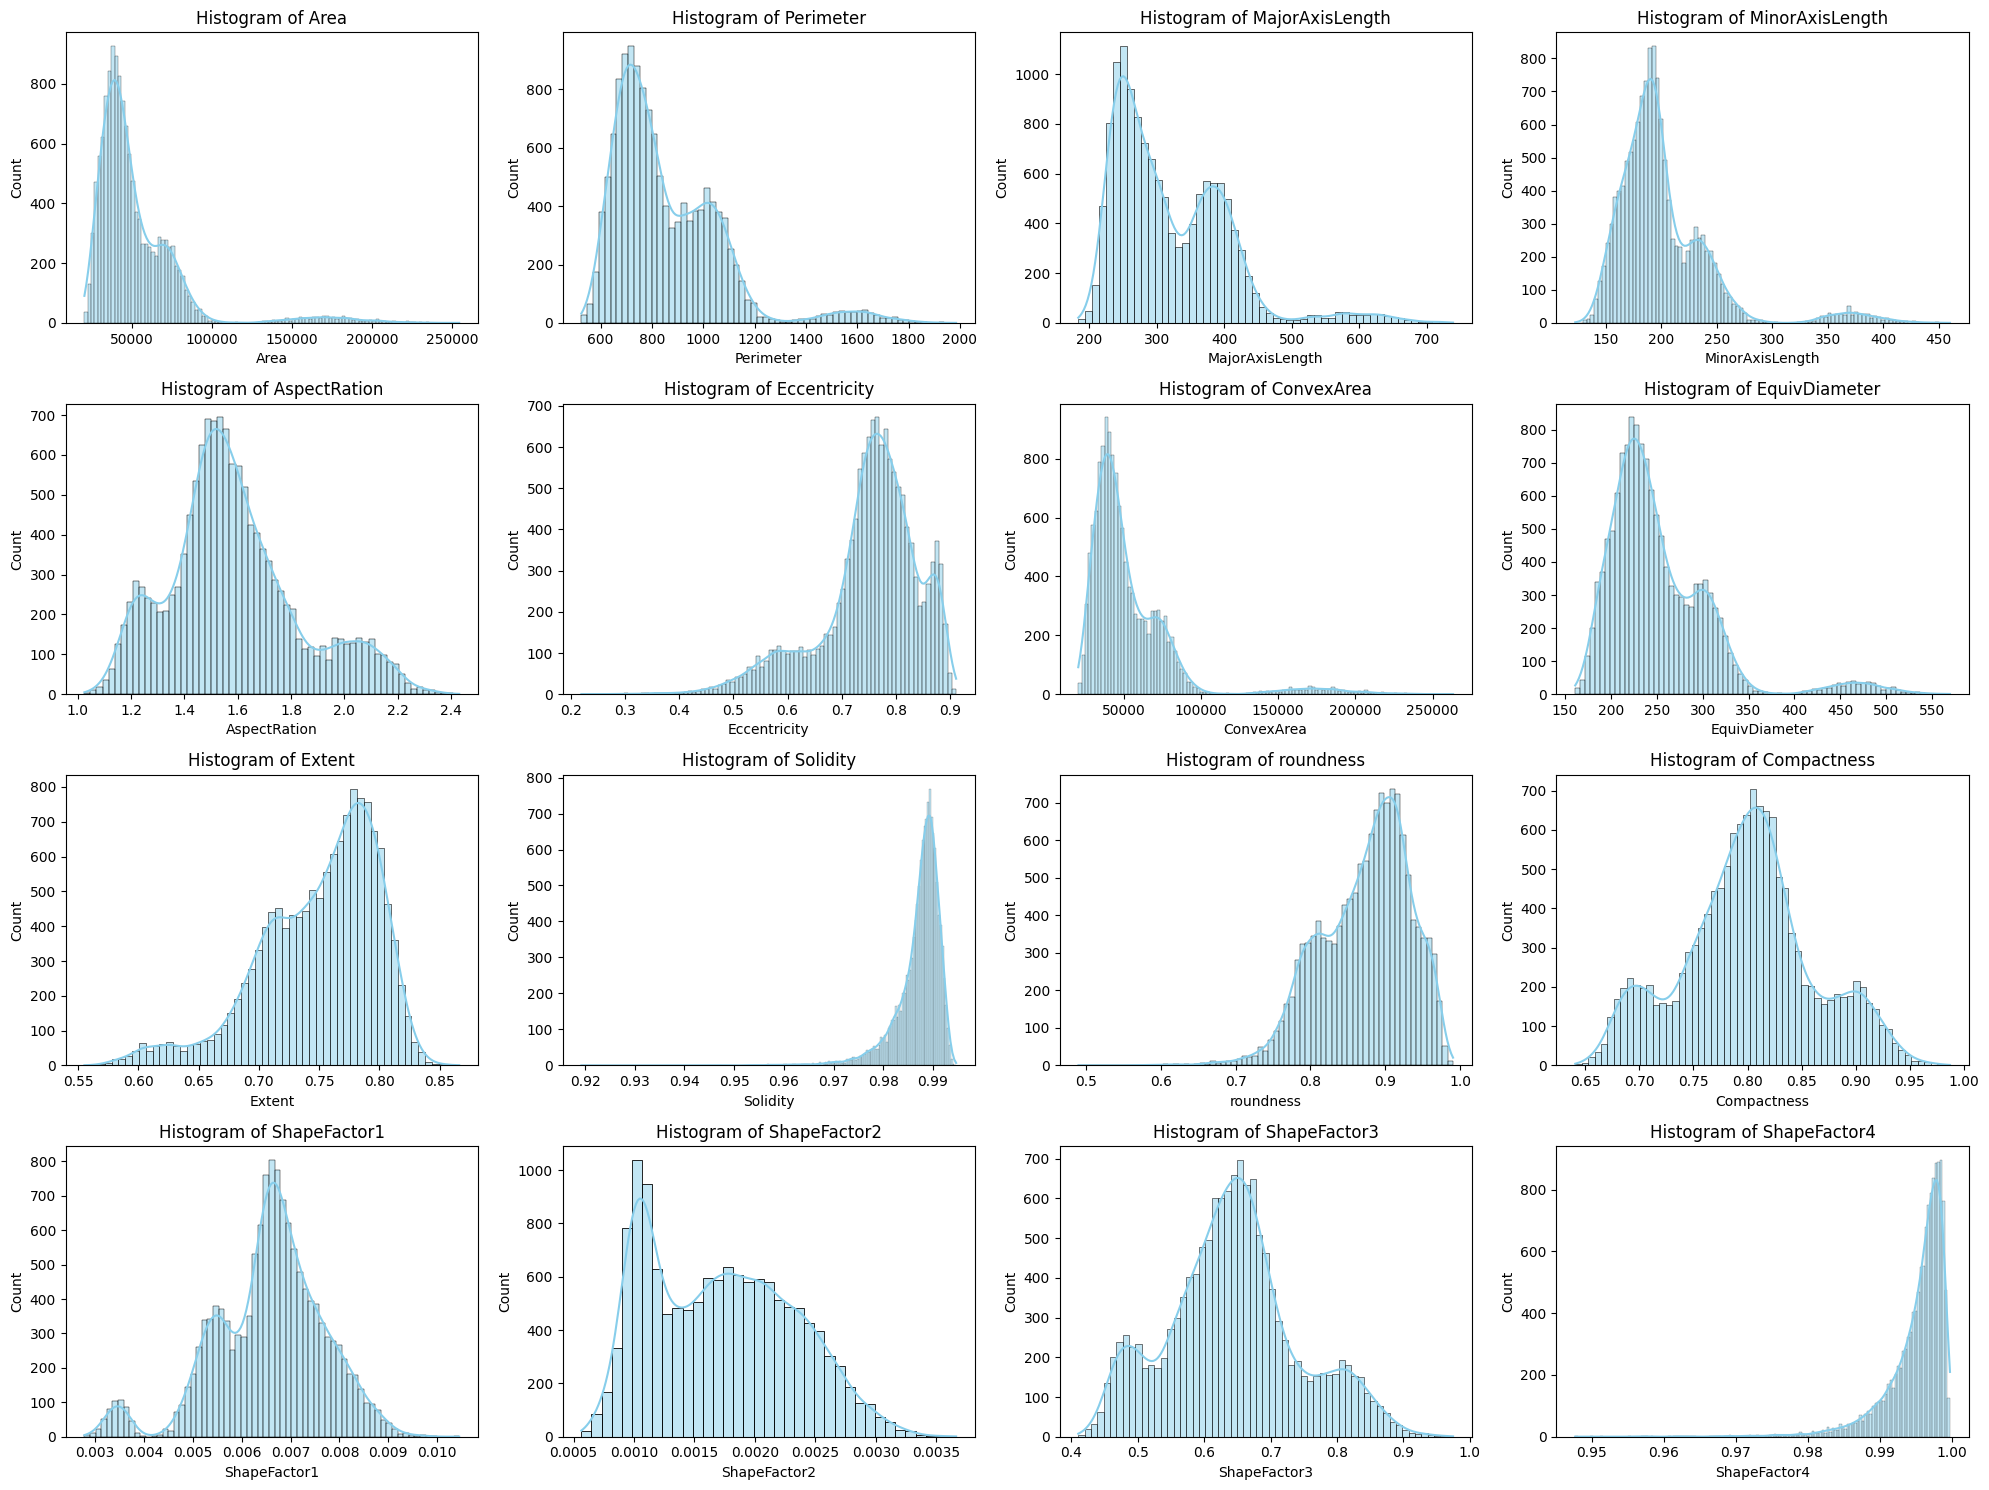

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

This section generates scatter plots to visualize the relationships between specific features and the separation of different classes.

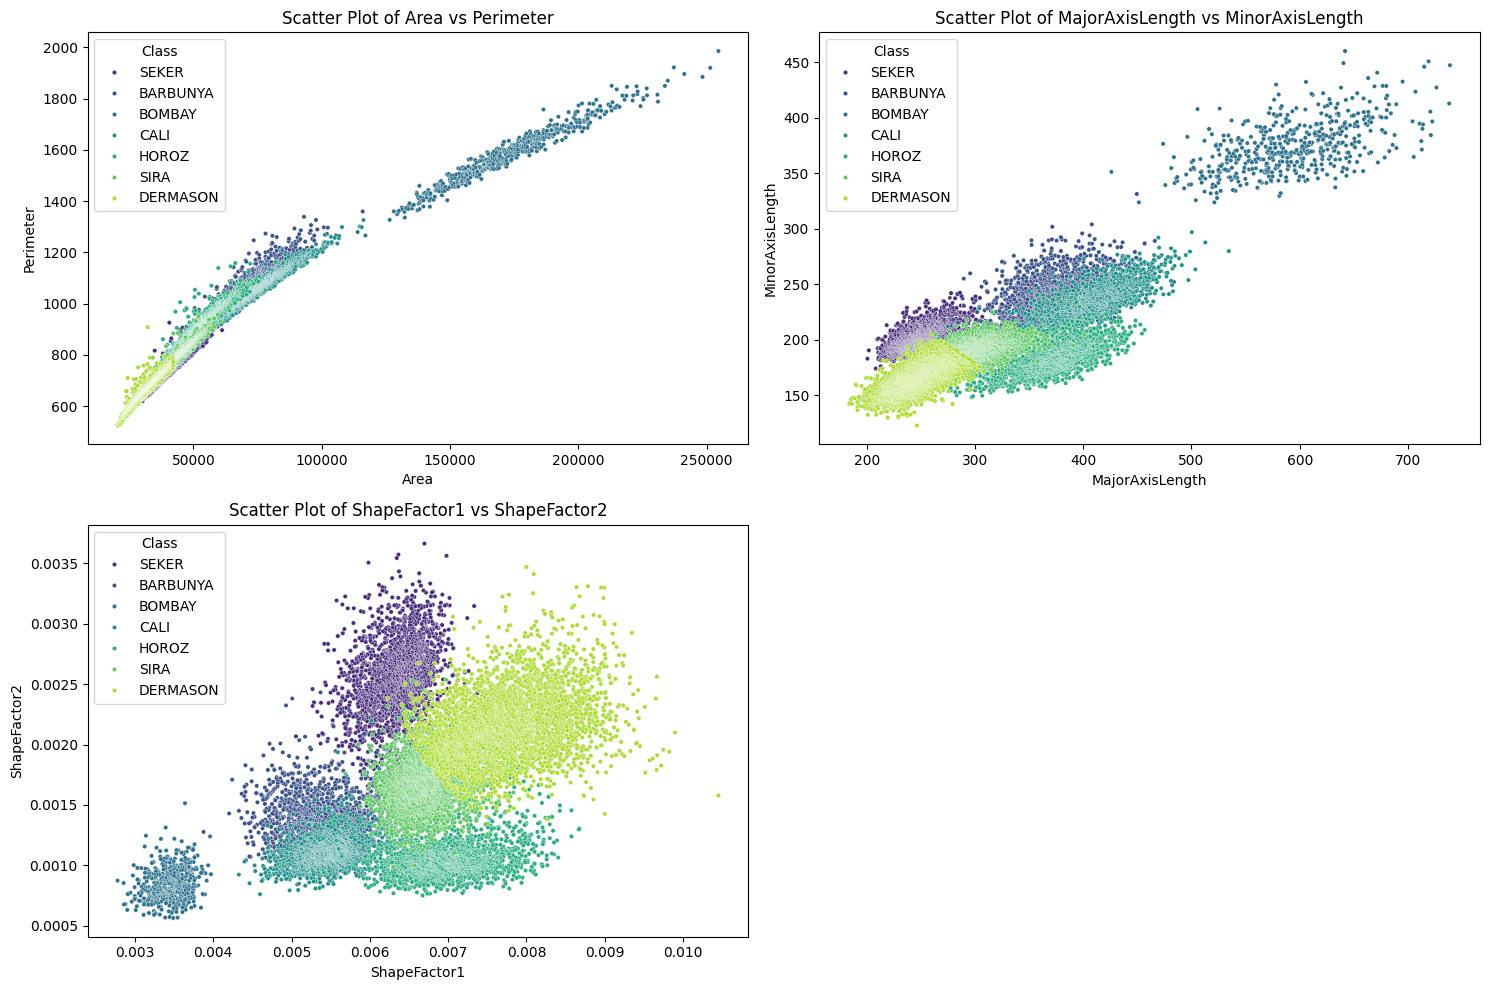

In [11]:
feature_pairs = [('Area', 'Perimeter'), ('MajorAxisLength', 'MinorAxisLength'), ('ShapeFactor1', 'ShapeFactor2')]
plt.figure(figsize=(15, 10))
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[x_feature], y=data[y_feature], hue=data['Class'], palette='viridis', s=10)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
plt.tight_layout()
plt.show()

Creating heatmap to visualize the correlatiopn matrix.

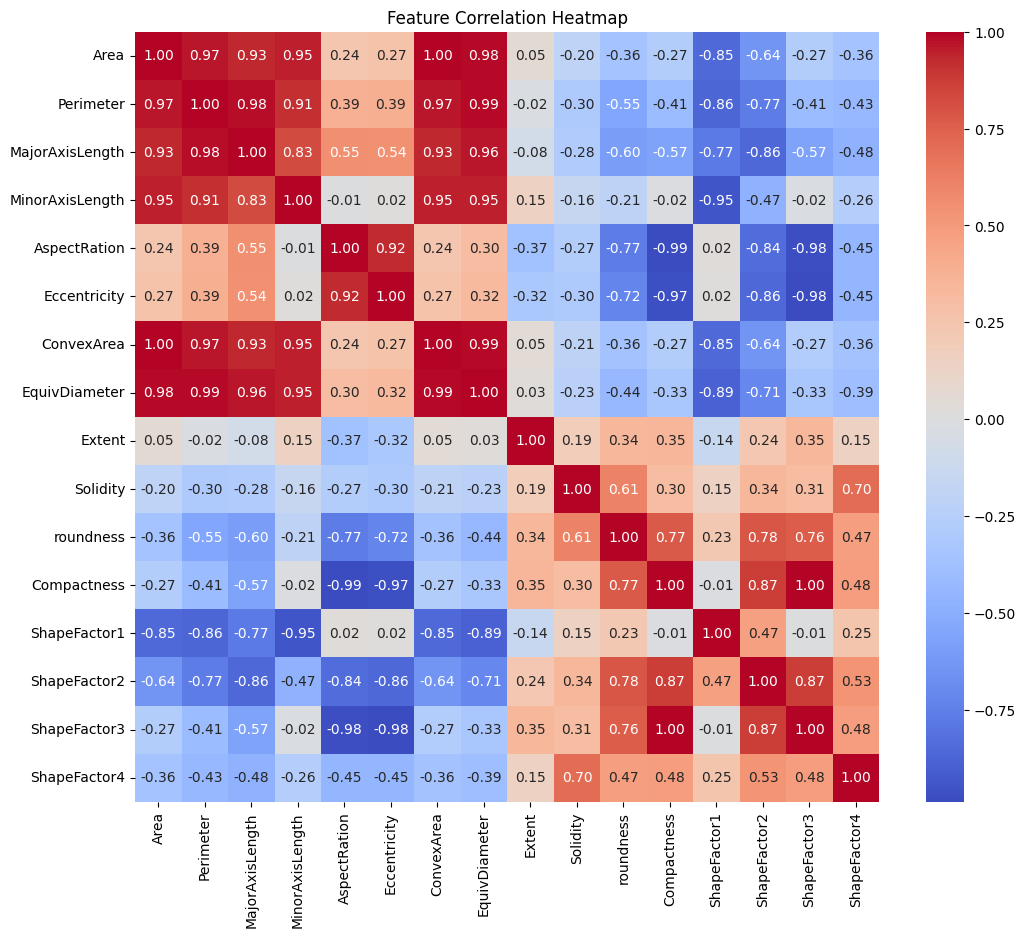

In [14]:
plt.figure(figsize=(12, 10))
corr_matrix = data.drop(columns=['Class']).corr() #I had to write it like this in order to prevent any errors caused by non-numerical columns.
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

**6-** Analyzing each feature for missing or null values.

In [15]:
missing_values = data.isnull().sum()
print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


**7-** Applying necessary data pre-processing (such as scaling).

Encoeding the target variable class to numeric labels.

Standardizing the feature set and replacing the original df features with the scaled features.

In [21]:
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Class'] = y

# **MODEL BUILDING PART**

**1-** Spliting the data into train and test sets.

In [23]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2-** What I did in this cell:

- Four different stochastic strategies were tested, each with its own unique parameter set.
-  Loss curves for all models are plotted on the same graph for direct comparison.

What I found out?

- The model using 'solver': 'sgd' with 'learning_rate': 'adaptive' failed to converge, leading to very high loss values.
sgd solvers are more sensitive to hyperparameters like the learning rate. I try to reduce learning rate to 0.01 but it didn't work as well. So I delete it.
- Adam solver and appropriate activations like 'relu, tanh' converged successfully.

Training with parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant'}
Training with parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive'}
Training with parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'constant'}
Training with parameters: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'logistic', 'solver': 'adam', 'learning_rate': 'adaptive'}


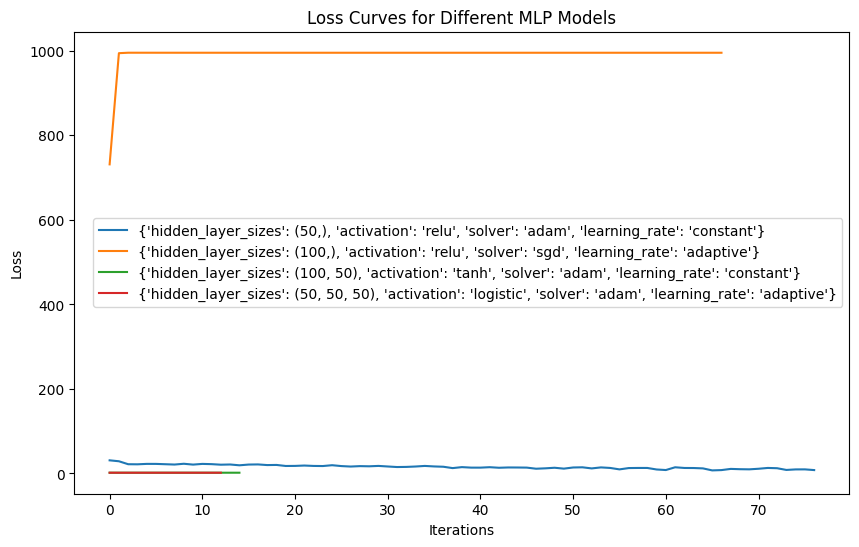

In [28]:
param_sets = [
    {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant'},
    {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive'},
    {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'learning_rate': 'constant'},
    {'hidden_layer_sizes': (50, 50, 50), 'activation': 'logistic', 'solver': 'adam', 'learning_rate': 'adaptive'}
]

loss_curves = []
for params in param_sets:
    print(f"Training with parameters: {params}")
    mlp = MLPClassifier(max_iter=200, **params, random_state=42)
    mlp.fit(X_train, y_train)
    loss_curves.append((mlp.loss_curve_, params))


plt.figure(figsize=(10, 6))
for loss_curve, params in loss_curves:
    plt.plot(loss_curve, label=str(params))
plt.title("Loss Curves for Different MLP Models")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

**3-** This code perfor grid search to find the best parameters for MLPClassifier.

In [30]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from Grid Search: {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


**4-** Traning the final MLP model with the best parameters.

In [31]:
best_params = grid_search.best_params_
final_mlp = MLPClassifier(**best_params, max_iter=200, random_state=42)
final_mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(50,), random_state=42)

Making predictions on the test set

In [32]:
y_pred = final_mlp.predict(X_test)

Ploting Confusion Matrix for the final model

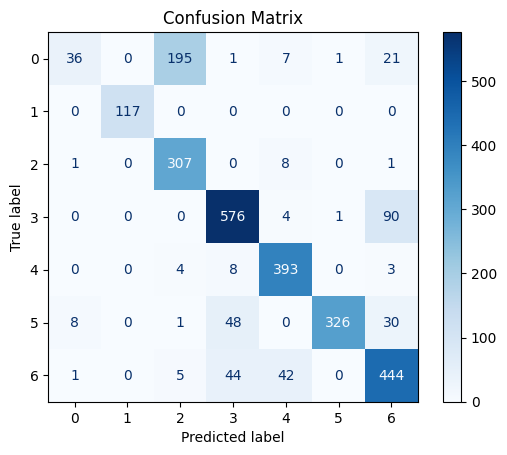

In [35]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Using classification_report method

In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.14      0.23       261
           1       1.00      1.00      1.00       117
           2       0.60      0.97      0.74       317
           3       0.85      0.86      0.85       671
           4       0.87      0.96      0.91       408
           5       0.99      0.79      0.88       413
           6       0.75      0.83      0.79       536

    accuracy                           0.81      2723
   macro avg       0.84      0.79      0.77      2723
weighted avg       0.83      0.81      0.79      2723



**5-** My comments on Model Building Part:

- I tested multiple parameter sets using stochastic learning strategies, and plot their loss curves for comparison.

- I applied GridSearchCV to find the optimal parameter combination for the MLPClassifier.

- The final MLP model was trained using the best parameters from GridSearchCV, and its performance was evaluated using a confusion matrix and a classification report.
